In [9]:
library(tidyverse) 
library(ggplot2)


### Part 1

In [13]:
data("mpg")
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [15]:
clean_mpg <- mpg %>%
  separate(trans, 
           into = c("transmission_type", "number_of_gears"), 
           sep = "\\(", 
           extra = "merge") %>%
  mutate(number_of_gears = str_remove(number_of_gears, "\\)")) %>%


  mutate(
    log_hwy = log(hwy),          
    sqrt_displ = sqrt(displ)    
  )

head(clean_mpg)

manufacturer,model,displ,year,cyl,transmission_type,number_of_gears,drv,cty,hwy,fl,class,log_hwy,sqrt_displ
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
audi,a4,1.8,1999,4,auto,l5,f,18,29,p,compact,3.367296,1.341641
audi,a4,1.8,1999,4,manual,m5,f,21,29,p,compact,3.367296,1.341641
audi,a4,2.0,2008,4,manual,m6,f,20,31,p,compact,3.433987,1.414214
audi,a4,2.0,2008,4,auto,av,f,21,30,p,compact,3.401197,1.414214
audi,a4,2.8,1999,6,auto,l5,f,16,26,p,compact,3.258097,1.673320
audi,a4,2.8,1999,6,manual,m5,f,18,26,p,compact,3.258097,1.673320


### Part 2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


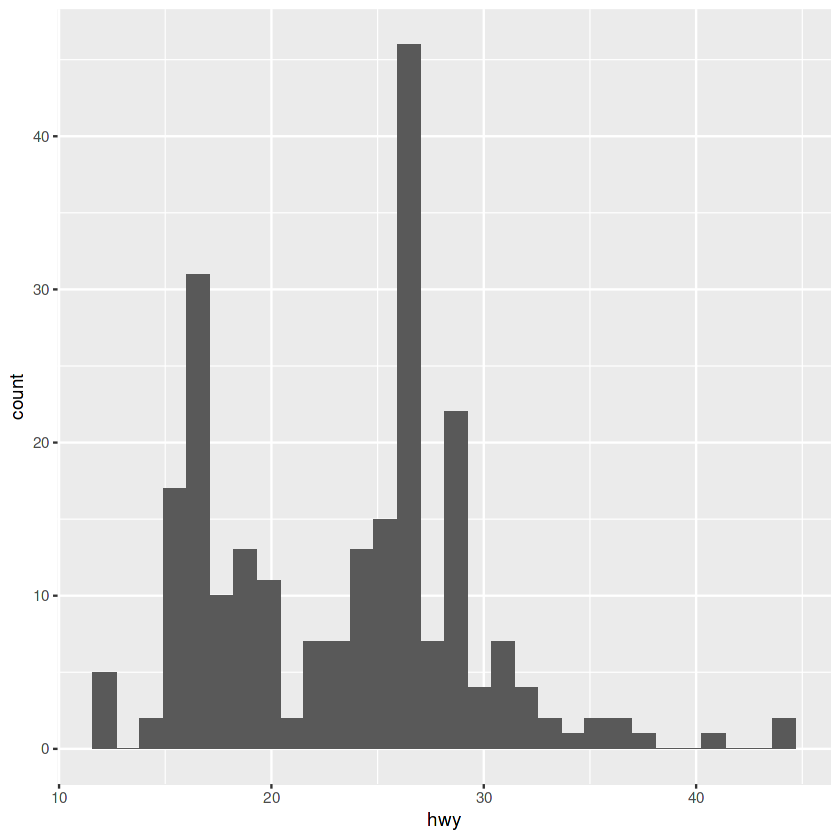

In [16]:
ggplot(mpg, aes(x = hwy))+
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


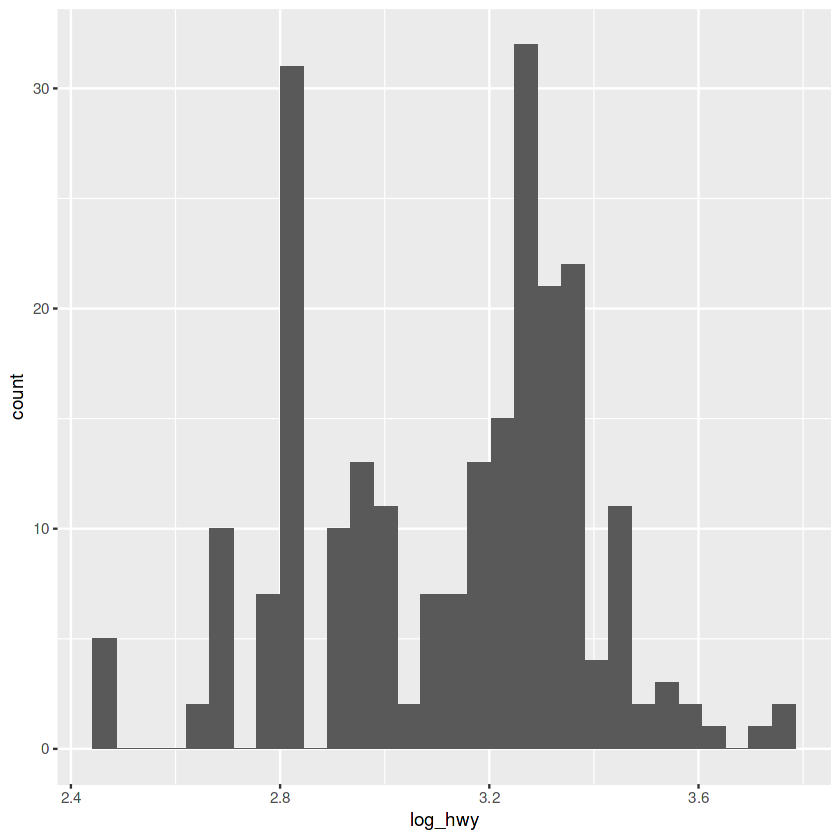

In [19]:
ggplot(clean_mpg, aes(x = log_hwy))+
geom_histogram()

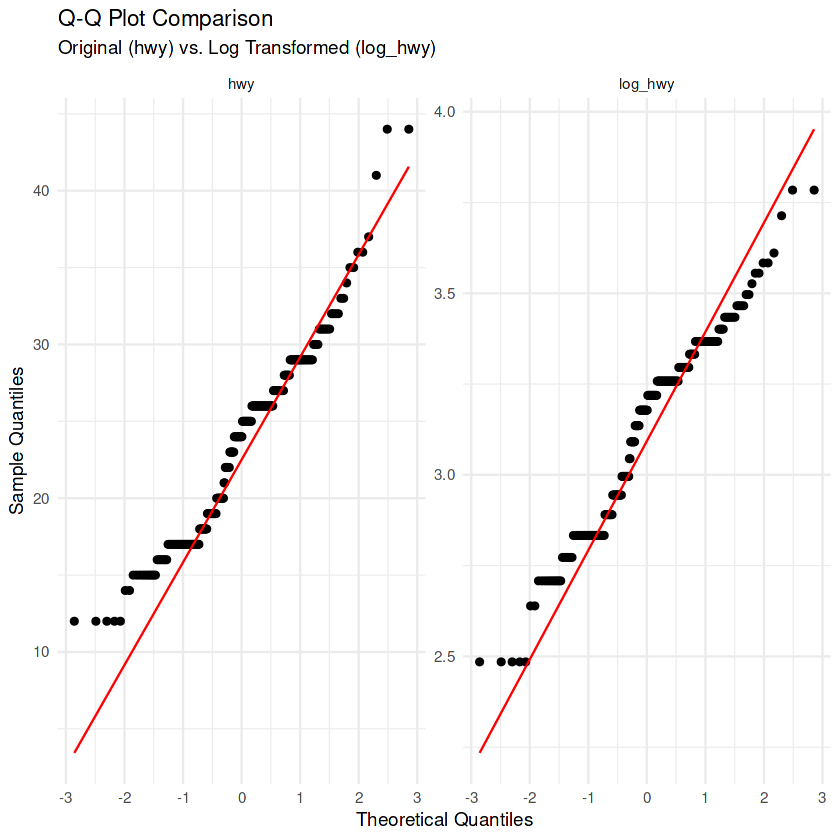

In [21]:

plot_data <- clean_mpg %>%
  select(hwy, log_hwy) %>%
  pivot_longer(cols = everything(), 
               names_to = "transformation", 
               values_to = "value")

ggplot(plot_data, aes(sample = value)) +
  stat_qq() +                       
  stat_qq_line(color = "red") +     
  facet_wrap(~transformation, scales = "free") + 
  theme_minimal() +
  labs(title = "Q-Q Plot Comparison",
       subtitle = "Original (hwy) vs. Log Transformed (log_hwy)",
       y = "Sample Quantiles",
       x = "Theoretical Quantiles")

How the transformation affected the distribution of the variable (2 points)

- The log transformation of the hwy column has significantly reduced its right skewness. This was done by compressing the extreme values and making the spread more even.

What the Q–Q plots indicate about symmetry and normality (2 points)
    
- The original plot showed a more deviated pattern from the reference line which was corrected after the application of the log transformation. This also displayed a more symmetric form and is a better approximation of a normal distribution.

### Part 3



I chose the log transformation for hwy and the square root transformation for displ because both variables exhibited right-skewness, and these techniques are standard for normalizing positive, skewed data. The transformations successfully improved the distributions by pulling in the right tails and centering the data, which was confirmed visually by the straightened Q-Q plots. Ensuring this normality is essential for future statistical modeling, such as linear regression, because many parametric tests rely on the assumption of normally distributed errors to generate accurate predictions and significance tests. 